## Breast cancer prediction

Breast tissue data can have a large number of features (pixel intensity values from an image), which can be computationally expensive to analyze. PCA identifies the most significant patterns in the data and projects it onto a lower dimensional space, preserving the key information while reducing complexity. 

-I used Random Forest first. Then I used PCA+SVM to find a better model. The accuracy went down little bit, but it achieved good dimension reduction.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

In [7]:
# Let us get the breast cancer dataset and save it into CSV file that we can load later
# data = load_breast_cancer()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df["target"] = data.target
# df.to_csv("breast_cancer.csv", index=False)


In [8]:
df = pd.read_csv("breast_cancer.csv")
print(df)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

## There are 30 features 
In the dataset 'benign' and 'maglinant' are presented as 1 and 0, respectively.

In [9]:
# For the purpose of exploratory data analysis, I will transform the target variable into text.
# df['target'] = df['target'].apply(lambda x: "Benign" if x == 1 else "Malignant")
# df.head(5)

In [10]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Exploratory Data Analysis

In [11]:
# Count plot of each diagnosis
print(df['target'].value_counts())
print("*********")


target
1    357
0    212
Name: count, dtype: int64
*********


In [12]:
# Extract X (independent variables/features)
X = df.drop(columns=["target"]).values  # Convert to numpy.ndarray

# Extract y (target variable)
y = df["target"].values  # Convert to numpy.ndarray

print(X)  # Should print: <class 'numpy.ndarray'>
print(y)  # Should print: <class 'numpy.ndarray'>


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

<Axes: >

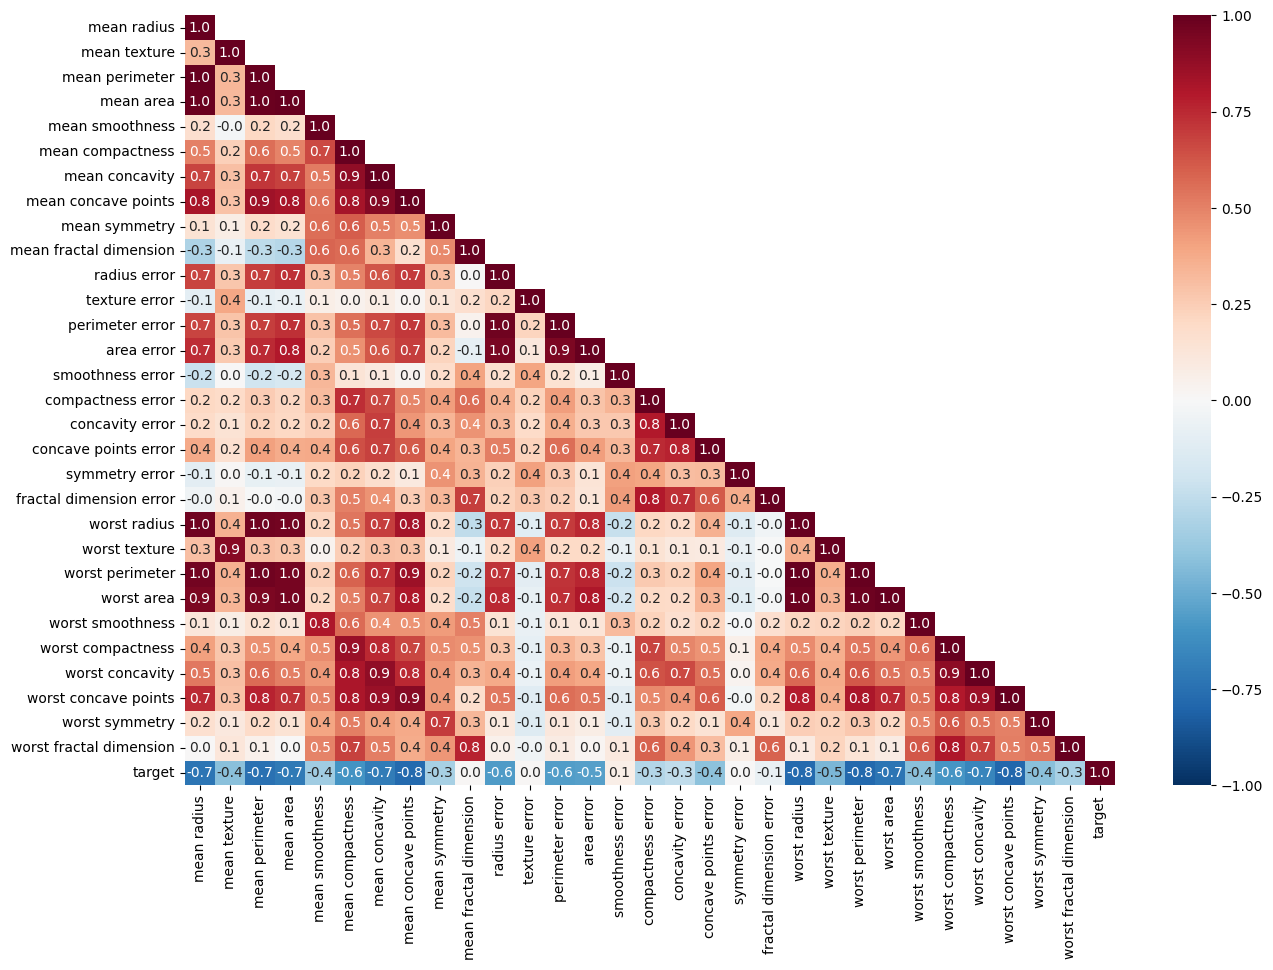

In [13]:
# Create correlation matrix
corr_mat = df.corr()

# Create mask
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1,
            mask=mask)

From the heat map, we can see that many variables in the dataset are highly correlated. What are variables having correlation greater than 0.8?

<Axes: >

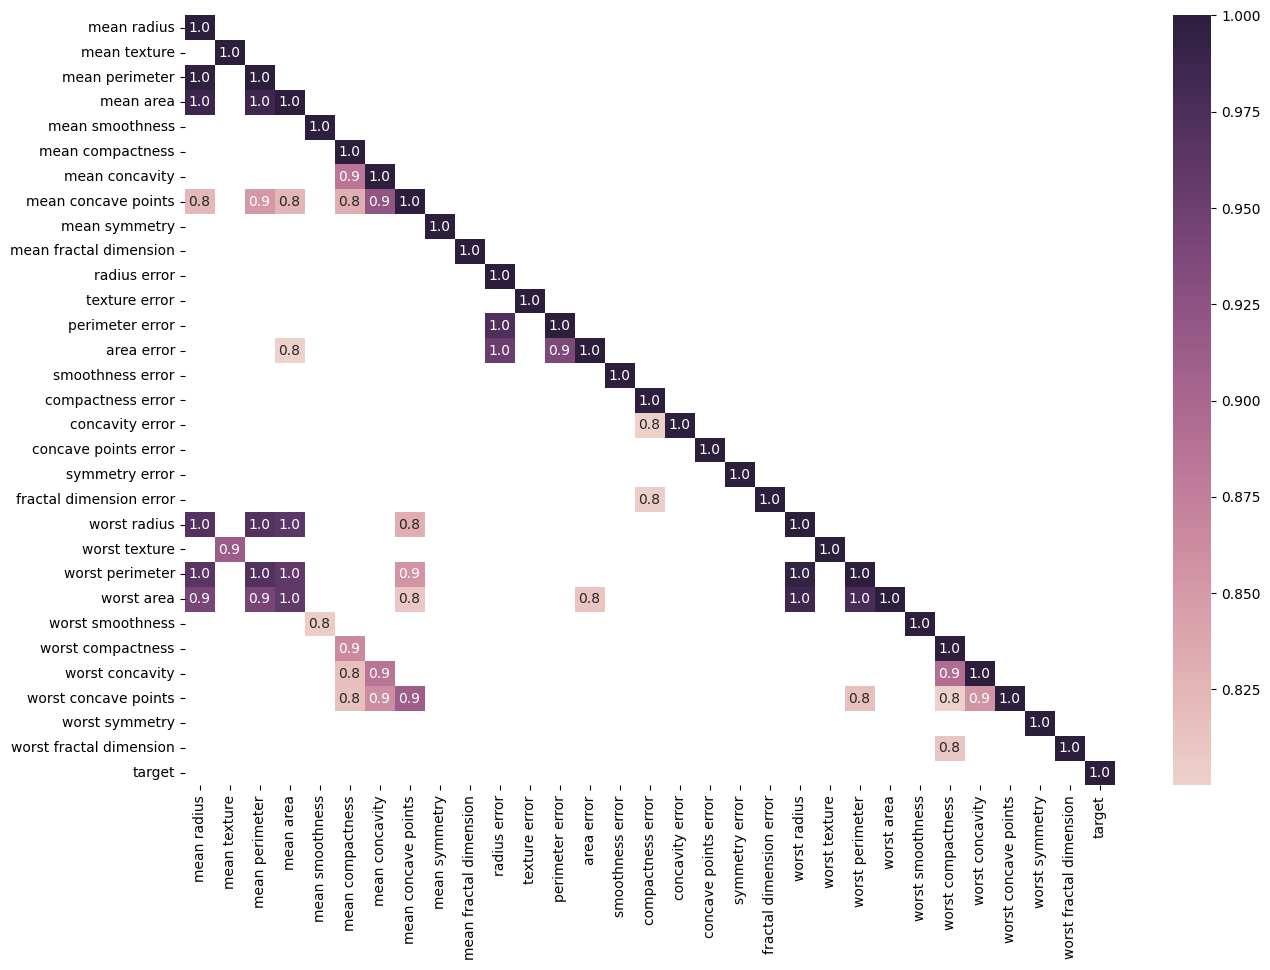

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat > 0.8],
            annot=True,
            fmt='.1f',
            cmap=sns.cubehelix_palette(200),
            mask=mask)

Well, we have some work to do with feature selection.

## Create Model
### 1. Feature Selection and Random Forest Classifier
Feature selection
I will use Univariate Feature Selection (sklearn.feature_selection.SelectKBest) to choose 5 features with the k highest scores. I choose 5 because from the heatmap I could see about 5 groups of features that are highly correlated.
- Here I select the top 5 most important features based on the ANOVA F-statistic, because feature values are numerical in nature.
- NOTE: I cannot use Chi-Square (χ²) statistical test becuase it is used when feature variables are categorical in nature.


In [35]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Read the dataset
df = pd.read_csv("breast_cancer.csv")

# Extract features (all columns except last one) and target (last column)
df_features = df.iloc[:, :-1]  
df_target = df.iloc[:, -1]  

# Select top 5 most important numerical features using ANOVA F-statistic
feature_selection = SelectKBest(f_classif, k=5)
feature_selection.fit(df_features, df_target)

# Get selected feature names
selected_features = df_features.columns[feature_selection.get_support()]
print("Top 5 important features:", list(selected_features))

X = pd.DataFrame(feature_selection.transform(df_features),
                 columns=selected_features)
X.head()

Top 5 important features: ['mean perimeter', 'mean concave points', 'worst radius', 'worst perimeter', 'worst concave points']


,mean perimeter,mean concave points,worst radius,worst perimeter,worst concave points
0,122.80,0.14710,25.38,184.60,0.2654
1,132.90,0.07017,24.99,158.80,0.1860
2,130.00,0.12790,23.57,152.50,0.2430
3,77.58,0.10520,14.91,98.87,0.2575
4,135.10,0.10430,22.54,152.20,0.1625


In [36]:
y = df['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [38]:
# Model evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 63   4]
 [  4 117]]


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.97      0.97      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



The accuracy rate is approximately 96%. The model only makes 4+3=7 wrong predictions out of 188. Our chosen features are pretty good in identifying cancer.

###  PCA and SVM
Now lets apply PCA and then use SVM to see if we can do any better than above Random forest.

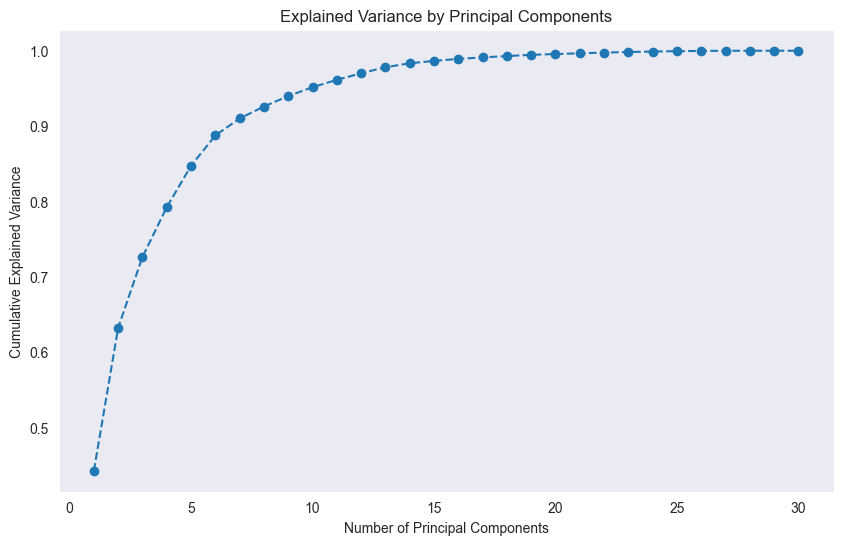

In [41]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to get explained variance
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

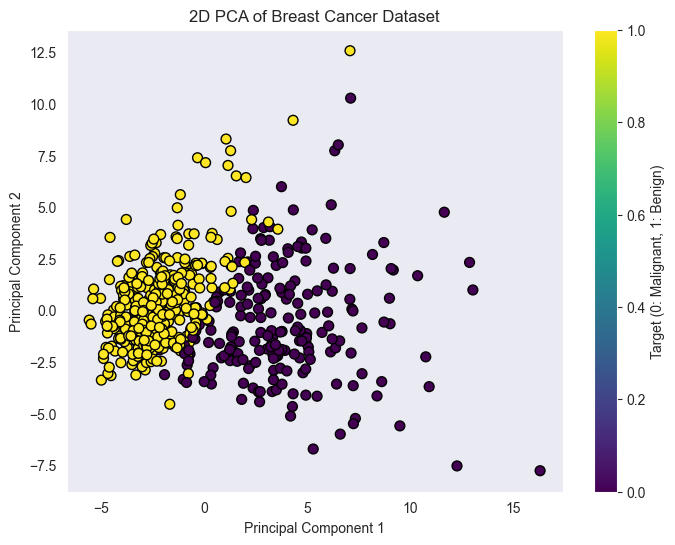

In [42]:
# Reduce dimensions to 2 for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot the 2D PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('2D PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target (0: Malignant, 1: Benign)')
plt.grid()
plt.show()

In [15]:
# Print explained variance of the first two components
explained_variance_2d = pca_2d.explained_variance_ratio_
print(f"Explained variance by the first two components: {explained_variance_2d}")


Explained variance by the first two components: [0.44272026 0.18971182]


In [46]:
X = X_pca_2d
# y = df_target['target']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## Support Vector Machines (SVM)

In [47]:
from sklearn.svm import SVC

In [48]:
# GridSearch
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [49]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [50]:
y_pred = grid.predict(X_test)

In [52]:
# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 62   5]
 [  5 116]]


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.96      0.96      0.96       121

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



The accuracy rate is 95%. This model made a bit more wrong predictions than other models like Random Forest model. However, with PCA, we can reduce the number of dimensions in our data